# Convolutional Neural Networks with PyTorch Exercise (5 points)



# 1. Load the Dataset

We will use the LFW dataset (Labeled Faces in the Wild), which as you may recall we used in Lecture 21, and consists of 5,000 images of 62 celebrities. The dataset is split into train, test, and validation datasets, saved as pickled files, and it can be downloaded by following this [link](https://www.dropbox.com/sh/1et0orsnzmubs1f/AAAfSJ10G2duian1bcpBDE6aa?dl=0). If you use Google Colab for this exercise, upload the folder `data` to Google Drive. 

Create a new dataset class for loading the LFW dataset, as a subclass of the PyTorch `Dataset` class, similar to the example in Lecture 17. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Assignment3(upd1106)/data

In [5]:
# Your Code Here
# import libraries
import numpy as np
import gzip
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
# trochvision is part of PyTorch consisting of models and datasets for computer vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim

class MyDataset(Dataset):
    def __init__(self, filepath):
        with gzip.open(filepath, mode='rb') as f:
             dataset = pickle.load(f)
        
        self.transform = ToTensor()
        self.features = dataset['features']
        self.labels = dataset['labels'] 
    
    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, idx):
        feature = self.features[idx]
        feature = self.transform(feature)
        label = self.labels[idx]

        return feature, label


'''
Note: the files were pickled using gzip, and to read the files you need to use 'gzip.open()'
E.g.:

import gzip
...
...
with gzip.open(filepath, mode='rb') as f:
      dataset = pickle.load(f)

'''

"\nNote: the files were pickled using gzip, and to read the files you need to use 'gzip.open()'\nE.g.:\n\nimport gzip\n...\n...\nwith gzip.open(filepath, mode='rb') as f:\n      dataset = pickle.load(f)\n\n"

Instantiate the train, test, and validation datasets from the files saved in the Google Drive directory. Print the lengths of the train, test, and validation datasets. 


In [6]:
# Your Code Here
import pickle

train_dataset = MyDataset('train.p')
test_dataset = MyDataset('test.p')
validation_dataset = MyDataset('valid.p')

print("train_dataset",len(train_dataset))
print("test_dataset",len(test_dataset))
print("validation_dataset",len(validation_dataset))

train_dataset 3043
test_dataset 1049
validation_dataset 1021


Apply PyTroch `DataLoader` to create iterators over batches of images and labels for the datasets. 

In [7]:
# Your Code Here
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=64)
validation_dataloader = DataLoader(validation_dataset, shuffle=False, batch_size=64)


Use the `make_grid()` function to plot images from the train dataset.

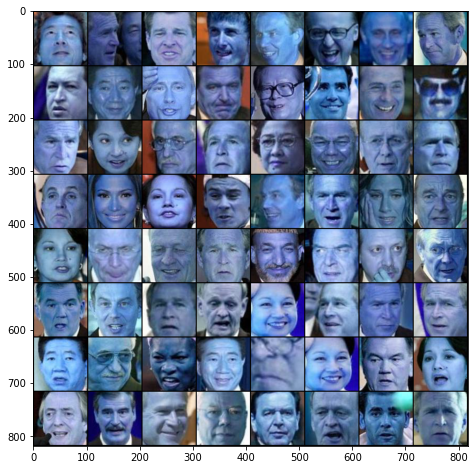

In [8]:
# Your Code Here
# show several images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get a batch of random training images and labels
images, labels = iter(train_dataloader).next()

# show images
plt.figure(figsize=(8,8))
imshow(torchvision.utils.make_grid(images))


# 2. Define the Model

Let's use again a pretrained VGG-16 model. Create an instance of the model, e.g., called `model_1` and replace the final layer with a custom layer to output 62 class probabilities. 

In [14]:
# Your Code Here
from torchvision.models import vgg16

#VGG16
model_1 = vgg16(pretrained=True)
# replace the last layer in VGG with a dense layer to predict 62 classes
model_1.classifier._modules['6'] = nn.Linear(4096, 62)

Move the model to the GPU device. 

In [15]:
# Your Code Here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
model_1.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 3. Train and Evaluate the Model

Train the model, plot the learning curves, and evaluate the performance on the test dataset. It is expected to achieve a test accuracy of over 90%. If needed, retrain the model with different number of epochs, learning rate, or other hyperparameters that achieve over 90% accuracy. 

Epoch: 1/30	 Training loss: 173.352	 Training accuracy: 17.844	 Validation accuracy: 24.780
Epoch: 2/30	 Training loss: 126.862	 Training accuracy: 36.083	 Validation accuracy: 54.946
Epoch: 3/30	 Training loss: 77.043	 Training accuracy: 57.345	 Validation accuracy: 72.772
Epoch: 4/30	 Training loss: 44.983	 Training accuracy: 73.053	 Validation accuracy: 81.195
Epoch: 5/30	 Training loss: 27.081	 Training accuracy: 83.405	 Validation accuracy: 83.154
Epoch: 6/30	 Training loss: 18.501	 Training accuracy: 88.531	 Validation accuracy: 86.386
Epoch: 7/30	 Training loss: 11.748	 Training accuracy: 93.066	 Validation accuracy: 90.108
Epoch: 8/30	 Training loss: 7.746	 Training accuracy: 95.399	 Validation accuracy: 89.226
Epoch: 9/30	 Training loss: 6.359	 Training accuracy: 96.089	 Validation accuracy: 90.793
Epoch: 10/30	 Training loss: 5.612	 Training accuracy: 96.287	 Validation accuracy: 90.206
Epoch: 11/30	 Training loss: 4.173	 Training accuracy: 97.502	 Validation accuracy: 92.067

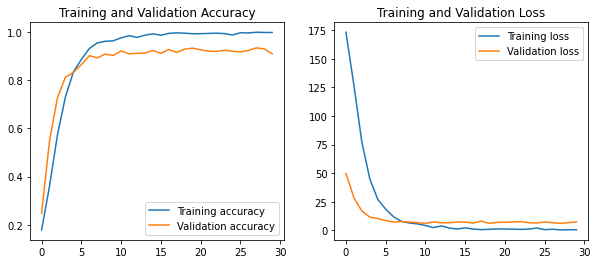

Test dataset accuracy: 91.230


'\nNote: when moving the data to the GPU, please use:\n\nimages, labels = images.to(device, dtype=torch.float), labels.to(device)\n'

In [16]:
# Your Code Here
# train the model for one epoch on the given set
def train(model, train_loader, criterion, optimizer, epoch):
    running_loss, total, sum_correct = 0.0, 0, 0

    # indicate this is a training step
    model.train() 

    for i, data in enumerate(train_loader):
        images, labels = data
        labels = labels.type(torch.LongTensor)
        images, labels = images.to(device, dtype=torch.float), labels.to(device)

        # forward + loss + backward + update
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # calculate loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        sum_correct += (predicted == labels).sum().item()
    
    # return the accuracy and loss
    return sum_correct/total, running_loss


# evaluate the model on the given set
def validate(model, val_loader, criterion):
    running_loss, total, sum_correct = 0.0, 0, 0

    # indicate this is an evaluation step
    model.eval()

    with torch.no_grad():
        for i, data in enumerate(val_loader):
            images, labels = data
            labels = labels.type(torch.LongTensor)
            images, labels = images.to(device, dtype=torch.float), labels.to(device)

            # Compute the output: forward pass only
            outputs = model(images)
            loss = criterion(outputs, labels)

            # calculate loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            sum_correct += (predicted == labels).sum().item()

    # return the accuracy and loss
    return sum_correct/total, running_loss




criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.9)






# total number of training epochs
epoch_num = 30

# initialize variables to save the training and validation loss and accuracy
training_loss_plot = []
training_accuracy_plot = []
val_loss_plot = []
val_accuracy_plot = []

# loop over the number of epochs
for epoch in range(epoch_num):  

    # train for one epoch: return accuracy and loss
    tr_accuracy, tr_loss = train(model_1, train_dataloader, criterion, optimizer, epoch)

    # evaluate after each epoch: return accuracy and loss
    val_accuracy, val_loss = validate(model_1, validation_dataloader, criterion)

    # append the accuracies and losses after each epoch
    training_accuracy_plot.append(tr_accuracy)
    training_loss_plot.append(tr_loss)
    val_accuracy_plot.append(val_accuracy)
    val_loss_plot.append(val_loss)
    
    # Display after each epoch
    print(f'Epoch: {epoch + 1}/{epoch_num}\t Training loss: {tr_loss:.3f}\t',
              f'Training accuracy: {100*tr_accuracy:2.3f}\t Validation accuracy: {100*val_accuracy:2.3f}')
    






# plot the accuracy and loss for the training and validation datasets
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(training_accuracy_plot)
plt.plot(val_accuracy_plot)
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(training_loss_plot)
plt.plot(val_loss_plot)
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and Validation Loss')
plt.show()






# calculate the accuracy and loss on the test dataset
test_accuracy, test_loss = validate(model_1, test_dataloader, criterion)
print(f'Test dataset accuracy: {100*test_accuracy:2.3f}')
'''
Note: when moving the data to the GPU, please use:

images, labels = images.to(device, dtype=torch.float), labels.to(device)
'''

# 4. Train and Evaluate the Model with a Pretrained ResNet50 Model

Similarly to the VGG-16 model, import a pretrained ResNet50 model as `model_2`, and afterward train and evaluate the model on the LFW dataset. It is expected to achieve test accuracy over 90%. If needed, change the number of epochs, learning rate, or other hyperparameters.

Epoch: 1/10	 Training loss: 122.868	 Training accuracy: 41.538	 Validation accuracy: 57.982
Epoch: 2/10	 Training loss: 28.055	 Training accuracy: 85.311	 Validation accuracy: 83.448
Epoch: 3/10	 Training loss: 6.922	 Training accuracy: 96.812	 Validation accuracy: 93.438
Epoch: 4/10	 Training loss: 2.092	 Training accuracy: 99.113	 Validation accuracy: 95.690
Epoch: 5/10	 Training loss: 0.882	 Training accuracy: 99.704	 Validation accuracy: 95.886
Epoch: 6/10	 Training loss: 0.221	 Training accuracy: 100.000	 Validation accuracy: 96.572
Epoch: 7/10	 Training loss: 0.125	 Training accuracy: 100.000	 Validation accuracy: 95.886
Epoch: 8/10	 Training loss: 0.104	 Training accuracy: 100.000	 Validation accuracy: 96.082
Epoch: 9/10	 Training loss: 0.078	 Training accuracy: 100.000	 Validation accuracy: 96.278
Epoch: 10/10	 Training loss: 0.071	 Training accuracy: 100.000	 Validation accuracy: 96.474


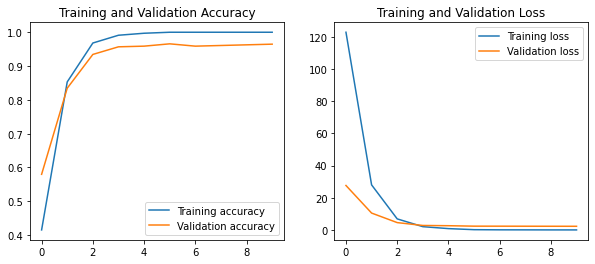

Test dataset accuracy: 94.948


'\nNote: \nThe last layer can be changed to:\nmodel_2.fc = nn.Linear(2048, num_classes)\n'

In [19]:
# Your Code Here
from torchvision.models import resnet50

#ResNet50
model_2 = resnet50(pretrained=True)
model_2.fc = nn.Linear(2048, 62)

model_2.to(device)



# train the model for one epoch on the given set
def train(model, train_loader, criterion, optimizer, epoch):
    running_loss, total, sum_correct = 0.0, 0, 0

    # indicate this is a training step
    model.train() 

    for i, data in enumerate(train_loader):
        images, labels = data
        labels = labels.type(torch.LongTensor)
        images, labels = images.to(device, dtype=torch.float), labels.to(device)

        # forward + loss + backward + update
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # calculate loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        sum_correct += (predicted == labels).sum().item()
    
    # return the accuracy and loss
    return sum_correct/total, running_loss


# evaluate the model on the given set
def validate(model, val_loader, criterion):
    running_loss, total, sum_correct = 0.0, 0, 0

    # indicate this is an evaluation step
    model.eval()

    with torch.no_grad():
        for i, data in enumerate(val_loader):
            images, labels = data
            labels = labels.type(torch.LongTensor)
            images, labels = images.to(device, dtype=torch.float), labels.to(device)

            # Compute the output: forward pass only
            outputs = model(images)
            loss = criterion(outputs, labels)

            # calculate loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            sum_correct += (predicted == labels).sum().item()

    # return the accuracy and loss
    return sum_correct/total, running_loss




criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)






# total number of training epochs
epoch_num = 10

# initialize variables to save the training and validation loss and accuracy
training_loss_plot = []
training_accuracy_plot = []
val_loss_plot = []
val_accuracy_plot = []

# loop over the number of epochs
for epoch in range(epoch_num):  

    # train for one epoch: return accuracy and loss
    tr_accuracy, tr_loss = train(model_2, train_dataloader, criterion, optimizer, epoch)

    # evaluate after each epoch: return accuracy and loss
    val_accuracy, val_loss = validate(model_2, validation_dataloader, criterion)

    # append the accuracies and losses after each epoch
    training_accuracy_plot.append(tr_accuracy)
    training_loss_plot.append(tr_loss)
    val_accuracy_plot.append(val_accuracy)
    val_loss_plot.append(val_loss)
    
    # Display after each epoch
    print(f'Epoch: {epoch + 1}/{epoch_num}\t Training loss: {tr_loss:.3f}\t',
              f'Training accuracy: {100*tr_accuracy:2.3f}\t Validation accuracy: {100*val_accuracy:2.3f}')
    






# plot the accuracy and loss for the training and validation datasets
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(training_accuracy_plot)
plt.plot(val_accuracy_plot)
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(training_loss_plot)
plt.plot(val_loss_plot)
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and Validation Loss')
plt.show()






# calculate the accuracy and loss on the test dataset
test_accuracy, test_loss = validate(model_2, test_dataloader, criterion)
print(f'Test dataset accuracy: {100*test_accuracy:2.3f}')
'''
Note: when moving the data to the GPU, please use:

images, labels = images.to(device, dtype=torch.float), labels.to(device)
'''

'''
Note: 
The last layer can be changed to:
model_2.fc = nn.Linear(2048, num_classes)
'''


# 5. Save and Load the Model Parameters

Save the state dictionary for `model_2`. 

In [20]:
# Your Code Here
torch.save(model_2.state_dict(), 'model_2.pth')

Load the state dictionary and evaluate the performance on the test dataset to ensure that the accuracy is the same.

In [21]:
# Your Code Here
#create and instance
model_check = model_2

model_check.load_state_dict(torch.load('model_2.pth'))
# calculate the accuracy and loss on the test dataset
test_accuracy, test_loss = validate(model_check, test_dataloader, criterion)
print(f'Test dataset accuracy: {100*test_accuracy:2.3f}')

Test dataset accuracy: 94.948
